## Auto-Encoder working on Fashion-MNIST data.

Here the autoencoder learns how an image is formed for an item amongst the 10 items present in the fashion-mnist data and predicts or basically forms a new image on its own throught the patterns and combination it learned during the training.

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import os
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
import matplotlib as mpl

#### In the following cell the model has a small error in the last Dense layer. This is done purposely to get a feel of the pixels predicted by the auto-encoder.

Using TensorFlow backend.


Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 43s 711us/step - loss: 1.1860 - rounded_accuracy: 0.4846 - val_loss: 1.4907 - val_rounded_accuracy: 0.4088
Epoch 2/5
60000/60000 [==============================] - 40s 665us/step - loss: 1.3444 - rounded_accuracy: 0.4542 - val_loss: 1.2786 - val_rounded_accuracy: 0.4676
Epoch 3/5
60000/60000 [==============================] - 40s 662us/step - loss: 1.6800 - rounded_accuracy: 0.4047 - val_loss: 1.5166 - val_rounded_accuracy: 0.4247
Epoch 4/5
60000/60000 [==============================] - 40s 667us/step - loss: 1.7388 - rounded_accuracy: 0.3801 - val_loss: 2.4702 - val_rounded_accuracy: 0.2463
Epoch 5/5
60000/60000 [==============================] - 40s 660us/step - loss: 3.2475 - rounded_accuracy: 0.1566 - val_loss: 4.0351 - val_rounded_accuracy: 0.0365


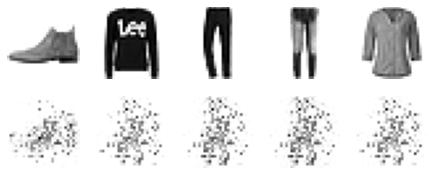

In [3]:
import keras
tf.random.set_seed(42)
np.random.seed(42)

(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test = x_test/255


def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))
    
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(30,activation='selu')
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(28*28,activation='selu'),
    keras.layers.Reshape([28,28])
])

stacked_auto = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_auto.compile(loss='binary_crossentropy',
                    optimizer='adam',metrics=[rounded_accuracy])
history = stacked_auto.fit(x_train,x_train,epochs=5,validation_data=(x_test,x_test))


def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def reconstructions(model,images=x_test,n_images=5):
    reconstruction = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5,3))
    for image_index in range(n_images):
        plt.subplot(2,n_images,1+image_index)
        plot_image(images[image_index])
        plt.subplot(2,n_images,1+n_images + image_index)
        plot_image(reconstruction[image_index])
        
reconstructions(stacked_auto)

#### Here we see a proper auto-encoder working the fashion-mnist data. After it is trained , we use the autoencoder to generate new images related to the data it was trained on.

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 21s 358us/step - loss: 0.3353 - rounded_accuracy: 0.8892 - val_loss: 0.3105 - val_rounded_accuracy: 0.9125
Epoch 2/5
60000/60000 [==============================] - 34s 574us/step - loss: 0.3050 - rounded_accuracy: 0.9159 - val_loss: 0.3019 - val_rounded_accuracy: 0.9204
Epoch 3/5
60000/60000 [==============================] - 35s 585us/step - loss: 0.2986 - rounded_accuracy: 0.9215 - val_loss: 0.2971 - val_rounded_accuracy: 0.9246
Epoch 4/5
60000/60000 [==============================] - 35s 575us/step - loss: 0.2947 - rounded_accuracy: 0.9250 - val_loss: 0.2987 - val_rounded_accuracy: 0.9252
Epoch 5/5
60000/60000 [==============================] - 35s 584us/step - loss: 0.2921 - rounded_accuracy: 0.9272 - val_loss: 0.2923 - val_rounded_accuracy: 0.9269


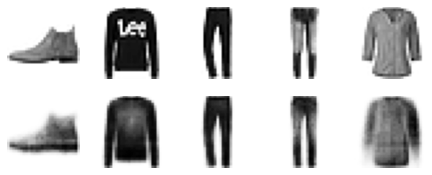

In [4]:
import keras
tf.random.set_seed(42)
np.random.seed(42)


(x_train,y_train),(x_test,y_test) = fashion_mnist.load_data()

x_train = x_train/255
x_test = x_test/255


def rounded_accuracy(y_true, y_pred):
    return keras.metrics.binary_accuracy(tf.round(y_true), tf.round(y_pred))
    
stacked_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(30,activation='selu')
])
stacked_decoder = keras.models.Sequential([
    keras.layers.Dense(100,activation='selu'),
    keras.layers.Dense(28*28,activation='sigmoid'),
    keras.layers.Reshape([28,28])
])

stacked_auto = keras.models.Sequential([stacked_encoder, stacked_decoder])
stacked_auto.compile(loss='binary_crossentropy',
                    optimizer=keras.optimizers.SGD(lr=1.5),metrics=[rounded_accuracy])
history = stacked_auto.fit(x_train,x_train,epochs=5,validation_data=(x_test,x_test))


def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")
    
def reconstructions(model,images=x_test,n_images=5):
    reconstruction = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5,3))
    for image_index in range(n_images):
        plt.subplot(2,n_images,1+image_index)
        plot_image(images[image_index])
        plt.subplot(2,n_images,1+n_images + image_index)
        plot_image(reconstruction[image_index])
        
reconstructions(stacked_auto)

#### Now since we have trained the auto-encoder we can now use it to visualize the high dimensional fashion-mnist into a 2-D graph since auto-encoders are useful for dimensionality reduction. 
##### Here we will use t-SNE algorithm for reducing the dimensions.

In [5]:
np.random.seed(42)

from sklearn.manifold import TSNE

X_valid_compressed = stacked_encoder.predict(x_test)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

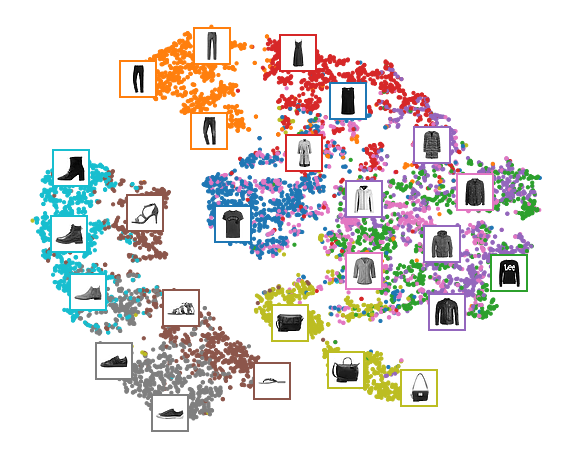

In [6]:
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_test, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(x_test[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_test[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()